
## License Plate Detection


## ___..___..___..___..___..___..___..___..___..___

### EasyOCr - to xtract Text from images 

[EasyOCR - extraction of text from Images ](https://github.com/JaidedAI/EasyOCR)

### PyTorch - to facilitate using EasyOCR

[PyTorch Documentation](https://pytorch.org/get-started/locally/)

#### cuda - Accelleration library

In [ ]:
!pip install imutils

### Importing modules 

In [14]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils 

[Resolve issue while importing OCR](https://stackoverflow.com/questions/70180988/kernel-died-when-using-easyocr)


In [4]:
import easyocr
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

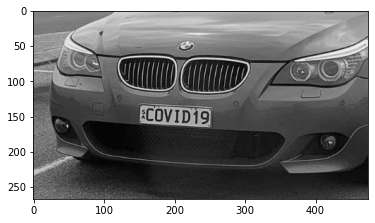

In [6]:
# Read in image , Grayscale and Blur 
img = cv2.imread('image2.jpg')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

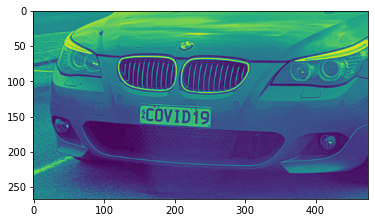

In [7]:
# Read in image , Grayscale and Blur 
img = cv2.imread('image2.jpg')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

### Apply some filtering and edge detection

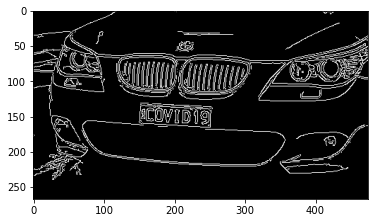

In [13]:
#Noise reduction
bfilter = cv2.bilateralFilter(gray,11,17,17) 
#Edge detection
edged= cv2.Canny(bfilter,30,200)

plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

### Contour Detection - for detection of shapes in the images 

In [15]:
#tries to go and find shapes in the image , 
#ie the image on which edge detection was applied
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#RETR - returns tree level defenition of different contours
#CHAIN_APPROX_SIMPLE - returns simplified version of the contours

#imulitls used to grab the contours - 
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #returning top 10 contors

In [17]:
#contours

In [18]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [19]:
location #find approx location of our number plate

array([[[152, 136]],

       [[248, 139]],

       [[251, 164]],

       [[153, 160]]], dtype=int32)

In [20]:
#the above array is the co-ordinates of the location of the number plate

### Now , we're trying masking and isolate the section out 

In [21]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

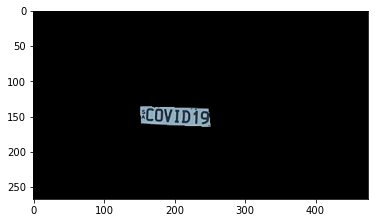

In [22]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [23]:
#Trying to isolate only the number plate


In [24]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]


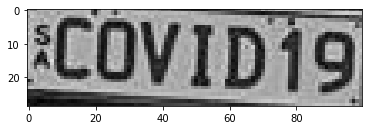

In [25]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

### use EasyOCR to Read Text 

In [28]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [100, 0], [100, 29], [0, 29]], 'ICOVIDT9', 0.5275641079442608)]

The final Result of the number plate detection is - ICOVIDT9 
Which may not be the most accurate, but it approximately close

### render the Result 

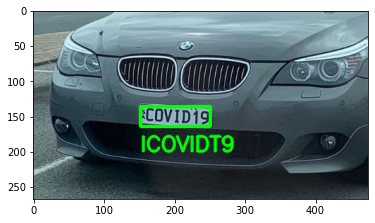

In [32]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))